In [18]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from csi.pipeline import kernels
import librosa
from librosa import display
from csi.vendor import simplefast
from csi.pipeline import ssm as ssmlib
import IPython.display as ipd

audio_file = '/dataset/YTCdataset/letitbe/v0.mp3'
audio_file = '/dataset/mazurkas/mazurka07-5/pid1263-09.mp3'
y, sr = librosa.load(audio_file)
tempo, beats = librosa.beat.beat_track(y=y, sr=sr, trim=False)
seconds = len(y)/sr
samples_per_beat = (60 * sr) / tempo
chroma_orig = librosa.feature.chroma_cens(y, sr, hop_length=2**11)
beat_f = librosa.util.fix_frames(beats, x_max=chroma_orig.shape[1])
sync = librosa.util.sync(chroma_orig, beat_f, aggregate=np.median)



/usr/local/lib/python3.5/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


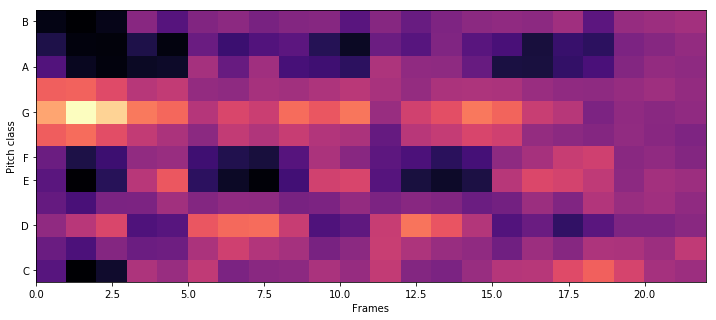

In [19]:
#
plt.figure(figsize=(12, 5))
display.specshow(sync, y_axis='chroma', x_axis='frames')
#plt.plot(sync)
plt.show()


In [20]:
  def calc_cic(crm_arr):
    crmip = np.zeros(12)
    tmtx = []
    for crmi in crm_arr.T:
        row_d = []
        for d in np.arange(-5,7,1):
            sum_crm = 0
            for i in range(12):
                sum_crm = sum_crm + (crmip[i]*crmi[(i+d)%12])
            row_d.append(sum_crm)
        #row_d = row_d/np.linalg.norm(row_d)
        row_d = (row_d-np.min(row_d))/(np.max(row_d)-np.min(row_d))
        crmip = crmi
        if not np.isnan(row_d).any():
            tmtx.append(row_d)
    tmtx = np.array(tmtx)
    tmtx = tmtx[1:-1,:].T
    tmtx = tmtx.tolist()
    return np.array(tmtx)

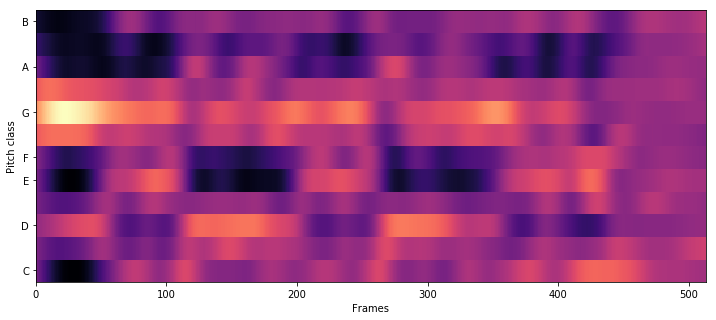

In [21]:
plt.figure(figsize=(12, 5))
display.specshow(chroma_orig, y_axis='chroma', x_axis='frames')
#plt.plot(sync)
plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


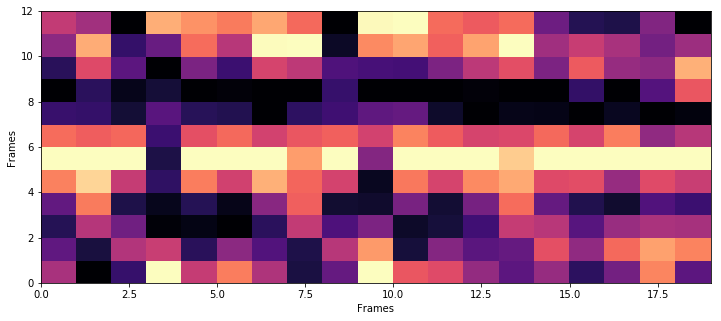

In [22]:
cic_sync = calc_cic(sync)
plt.figure(figsize=(12, 5))
display.specshow(cic_sync, y_axis='frames', x_axis='frames')
plt.show()

In [23]:
ssm = librosa.segment.recurrence_matrix(cic_sync, width=1, mode='affinity', sym=True, self=True)
ssm = librosa.segment.path_enhance(ssm, 3, window='hann', n_filters=3)


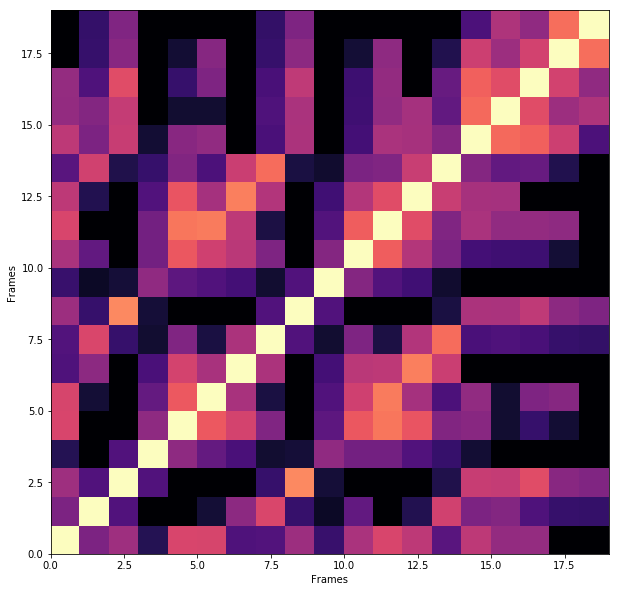

In [24]:
plt.figure(figsize=(10, 10))
display.specshow(ssm, **{'y_axis':'frames', 'x_axis':'frames'})
plt.show()